Exercises
 Dataset: Use the Iris dataset from Day 3 or a sampled subset.
 1. T-Test:
  1. Compare the mean petal lengths of two species (e.g., Setosa vs. Versicolor).
  2. Null Hypothesis: Means are equal.
  3. Use an independent t-test.
 2. Z-Test:
  1. Test if the mean sepal length of one species equals a specific value (e.g., 5.0).
  2. Null Hypothesis: Mean equals 5.0.
  3. Perform only if population standard deviation is known or n>30n > 30n>30.
 3. ANOVA:
  1. Compare mean petal widths across all three species.
  2. Null Hypothesis: All means are equal.
 4. Correlation/Regression:
  1. Explore the relationship between sepal length and petal length.

In [30]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway
from statsmodels.formula.api import ols

In [31]:
# Step 1: Load the Iris dataset
iris_data = sns.load_dataset('iris')
print("First 5 rows of the dataset:\n", iris_data.head())

First 5 rows of the dataset:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [32]:
# Step 2: Divide the dataset by species
setosa_data = iris_data[iris_data['species'] == 'setosa']
virginica_data = iris_data[iris_data['species'] == 'virginica']
versicolor_data = iris_data[iris_data['species'] == 'versicolor']

In [33]:
# Step 3: Perform T-Test (Setosa vs Virginica - Petal Length)
print("\nT-Test: Comparing petal lengths of Setosa and Virginica")
t_statistic, t_p_value = ttest_ind(setosa_data['petal_length'], virginica_data['petal_length'])
print(f"T-Statistic: {t_statistic:.3f}")
print(f"P-Value: {t_p_value:.3f}")
if t_p_value < 0.05:
    print("Result: Null hypothesis rejected - Significant difference in means.")
else:
    print("Result: Failed to reject Null hypothesis - Means are similar.")


T-Test: Comparing petal lengths of Setosa and Virginica
T-Statistic: -49.986
P-Value: 0.000
Result: Null hypothesis rejected - Significant difference in means.


In [34]:
# Step 4: Perform Z-Test (Mean Sepal Length vs Given Value)
given_mean = 5.0
population_sd = 0.5  # Assumed population standard deviation
sample_mean = iris_data['sepal_length'].mean()
sample_size = len(iris_data['sepal_length'])
z_statistic = (sample_mean - given_mean) / (population_sd / np.sqrt(sample_size))
print("\nZ-Test: Checking if the mean sepal length equals 5.0")
print(f"Z-Statistic: {z_statistic:.3f}")


Z-Test: Checking if the mean sepal length equals 5.0
Z-Statistic: 20.657


In [35]:

# Step 5: Perform ANOVA (Compare petal widths across species)
print("\nANOVA: Comparing petal widths across all species")
anova_f_stat, anova_p_value = f_oneway(
    setosa_data['petal_width'], versicolor_data['petal_width'], virginica_data['petal_width']
)
print(f"F-Statistic: {anova_f_stat:.3f}")
print(f"P-Value: {anova_p_value:.3f}")
if anova_p_value < 0.05:
    print("Result: Null hypothesis rejected - Significant differences exist.")
else:
    print("Result: Failed to reject Null hypothesis - Means are similar.")


ANOVA: Comparing petal widths across all species
F-Statistic: 960.007
P-Value: 0.000
Result: Null hypothesis rejected - Significant differences exist.


In [36]:
# Step 6: Correlation between Sepal Length and Petal Length
print("\nCorrelation: Sepal Length vs Petal Length")
correlation_coefficient = iris_data['sepal_length'].corr(iris_data['petal_length'])
print(f"Correlation Coefficient: {correlation_coefficient:.3f}")


Correlation: Sepal Length vs Petal Length
Correlation Coefficient: 0.872


In [37]:
# Step 7: Regression Analysis (Sepal Length -> Petal Length)
print("\nRegression Analysis: Sepal Length as predictor for Petal Length")
regression_model = ols('petal_length ~ sepal_length', data=iris_data).fit()
print(regression_model.summary())


Regression Analysis: Sepal Length as predictor for Petal Length
                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.04e-47
Time:                        22:34:53   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

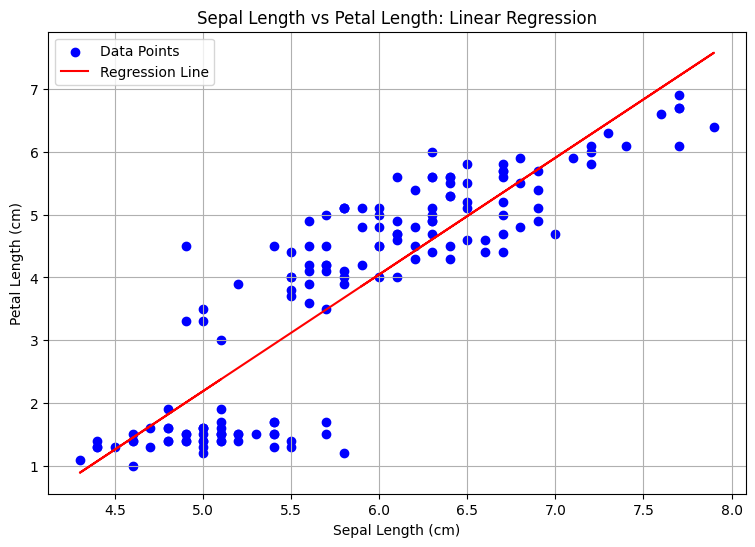

In [38]:
# Step 8: Plotting the Regression Results
plt.figure(figsize=(9, 6))
plt.scatter(iris_data['sepal_length'], iris_data['petal_length'], color='blue', label='Data Points')
plt.plot(iris_data['sepal_length'], regression_model.predict(), color='red', label='Regression Line')
plt.title('Sepal Length vs Petal Length: Linear Regression')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.grid()
plt.show()

The code starts off with importing the necessary libraries and loading Iris into a DataFrame. The data is then split into subsets by species for analysis. A T-Test is conducted to compare the petal lengths of Setosa and Virginica, testing if their means are considerably different. A Z-Test tests whether the average sepal length is equal to a specific value of 5.0, under an assumed population standard deviation. The ANOVA tests the equality of mean petal widths across the three species. The bivariate relationship between sepal length and petal length is explored using correlation and simple linear regression. The regression model is summarized, including its visualization as a scatterplot with a trend line to support each step in the analysis.